## Importing the Libraries and Dataset (temperaturee + daily bike rides merged)

In [1]:
# Importing libraries 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime as dt


In [2]:
# checking library versions
print(sns.__version__)
print(pd.__version__)
print(plt.matplotlib.__version__)

0.13.2
2.2.1
3.8.4


In [2]:
# Importing the dataset 
df = pd.read_pickle(r"C:\Users\Windows\NYC_bike_sharing\df_temp_Q1_merged.pkl")
df.head(3)

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,average_temp,bike_rides_daily
date,,,,,,,,,,,,,,,
2022-01-01,C401E951D3CE9CF1,classic_bike,2022-01-01 02:13:26,2022-01-01 02:14:57,Greenwich St & Perry St,5922.04,Perry St & Bleecker St,5922.07,40.734982,-74.006973,40.735355,-74.004829,member,11.6,20895
2022-01-01,008C583994B6DC9E,docked_bike,2022-01-01 14:05:37,2022-01-01 14:24:46,Columbus Ave & W 72 St,7175.05,5 Ave & E 78 St,7161.08,40.777058,-73.978989,40.776321,-73.964272,casual,11.6,20895
2022-01-01,2AFE5C9C23A7251A,classic_bike,2022-01-01 10:46:52,2022-01-01 11:05:27,E 11 St & 1 Ave,5746.14,Division St & Bowery,5270.08,40.729538,-73.984268,40.714191,-73.996735,member,11.6,20895


## Section A- Setting the Seaborn Theme

In [3]:
 # sns.set_theme(style="whitegrid", palette = "Blues_r") 
#  please note, unable to directly set a palette theme such as gradient or a reverse gradient. The palette will be added directly to to plot as one of the parameters to get a color gradient.
#For the palette, when setting the them, I was only able to get solid colors.
sns.set_theme(style="white") #for all the seaborn plots, a white background will be used. For the purpose of setting the theme, only the style parameter works. 




## Section B - Find the top 20 starting station by frequency

In [4]:
# Find the Top 20 starting stations by frequency

# Step 1: Count occurrences of each starting station
station_counts = df['start_station_name'].value_counts().reset_index()
station_counts.columns = ['start_station_name', 'count']


In [5]:
# Step 2: Select the top 20 starting stations
top_20_stations = station_counts.head(20)  # This dataset represents the top 20 starting stations by frequency 

In [6]:
top_20_stations

,start_station_name,count
0,W 21 St & 6 Ave,20699
1,1 Ave & E 68 St,18892
2,E 17 St & Broadway,17265
3,Broadway & W 58 St,16541
4,Broadway & E 21 St,16275
5,University Pl & E 14 St,16017
6,E 33 St & 1 Ave,15838
7,6 Ave & W 33 St,15428
8,8 Ave & W 33 St,14930
9,Broadway & E 14 St,14504


## Section C- Creating Seaborn Plots 

C:\Users\Windows\AppData\Local\Temp\ipykernel_14028\2515839990.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='count', y='start_station_name',data=top_20_stations, palette="dark")


Text(0, 0.5, 'Starting Station')

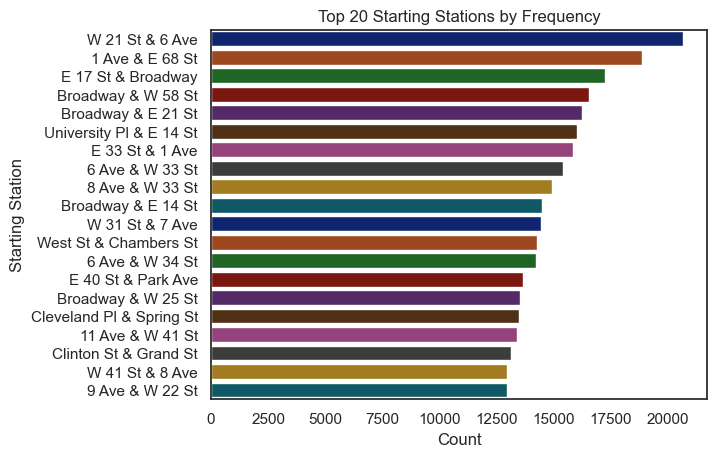

In [45]:
# create a barplot with seaborn - Plot # 1 

sns.barplot(x='count', y='start_station_name',data=top_20_stations, palette="dark")
plt.title('Top 20 Starting Stations by Frequency')
plt.xlabel('Count')
plt.ylabel('Starting Station')

#### Note: the color I chose is "dark", which is visually uninformative. There are only a limited number of colors and lacks a color gradient that display a color density depending on the value of the data point. For the next plot, I will be using a color gradient. The default palette is a solid blue, which is not visually appealing or provides any information. 

C:\Users\Windows\AppData\Local\Temp\ipykernel_10600\2630906277.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='count', y='start_station_name',data=top_20_stations, palette="crest_r")


Text(0, 0.5, 'Starting Station')

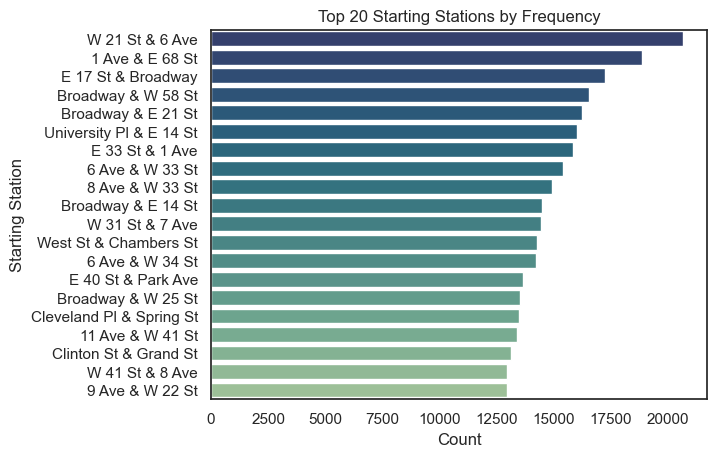

In [22]:
# # create a barplot with seaborn - Plot # 2 
# create a barplot with a color gradient. Choosing a palette like crest_r shades the barplot in a descening order from dark to light. 

sns.barplot(x='count', y='start_station_name',data=top_20_stations, palette="crest_r") # Note: I can only get a color gradient by adding the palette argument directly in the plot, not when setting the theme as mentioned above. 
plt.title('Top 20 Starting Stations by Frequency')
plt.xlabel('Count')
plt.ylabel('Starting Station')


## Section D -Recreate the dual-axis line plot (Temperature and Daily Bike Rides in NYC) using Seaborn.

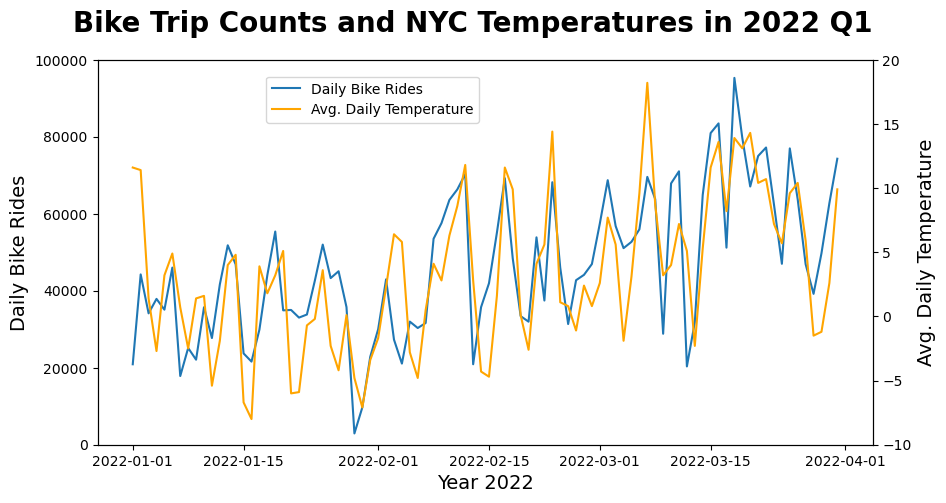

In [15]:
fig, ax = plt.subplots(figsize=(10, 5))
fig.suptitle("Bike Trip Counts and NYC Temperatures in 2022 Q1", fontsize=20, fontweight="bold")

# Plot the first line for daily bike rides
line1, = ax.plot(df['bike_rides_daily'], label='Daily Bike Rides')
ax.set_ylim(0, 100000)
ax.set_xlabel("Year 2022", fontsize=14)
ax.set_ylabel("Daily Bike Rides", fontsize=14)

# Create a second y-axis for the temperature data
ax2 = ax.twinx()
# Plot the second line for average temperature
line2, = ax2.plot(df['average_temp'], color="orange", label='Avg. Daily Temperature')
ax2.set_ylim(-10, 20)
ax2.set_ylabel('Avg. Daily Temperature', fontsize=14)

# Create combined legend manually and place it in the middle of the figure
fig.legend([line1, line2], ['Daily Bike Rides', 'Avg. Daily Temperature'], loc='center', bbox_to_anchor=(0.4, 0.8))

plt.show()




In [11]:
df.describe() # to make sure the plot captures the maximum and minimum

,started_at,ended_at,start_lat,start_lng,end_lat,end_lng,average_temp,bike_rides_daily
count,4179576,4179576,4.179576e+06,4.179576e+06,4.170246e+06,4.170246e+06,4.179576e+06,4.179576e+06
mean,2022-02-21 06:44:36.591123968,2022-02-21 07:01:43.184038912,4.073998e+01,-7.397660e+01,4.073982e+01,-7.397675e+01,5.014025e+00,5.377768e+04
min,2022-01-01 00:00:13,2022-01-01 00:02:15,4.063338e+01,-7.402747e+01,4.063338e+01,-7.407146e+01,-8.000000e+00,2.927000e+03
25%,2022-01-31 17:19:52.750000128,2022-01-31 17:33:53.750000128,4.071723e+01,-7.399316e+01,4.071723e+01,-7.399345e+01,8.000000e-01,4.163600e+04
50%,2022-02-24 11:11:12,2022-02-24 11:25:34,4.073971e+01,-7.398186e+01,4.073944e+01,-7.398193e+01,4.800000e+00,5.269500e+04
75%,2022-03-16 07:45:12,2022-03-16 07:57:17,4.076229e+01,-7.396222e+01,4.076201e+01,-7.396222e+01,9.900000e+00,6.817500e+04
max,2022-03-31 23:59:59,2022-04-03 17:40:49,4.088226e+01,-7.388145e+01,4.088226e+01,-7.388000e+01,1.820000e+01,9.528400e+04
std,NaN,NaN,9.405602e-01,2.571051e-01,9.238914e-01,2.803267e-01,5.813330e+00,1.784303e+04


## Section E- Seaborn Box Plots

### Note: For this section, I looked at two categorical variables. There are two box plots.

C:\Users\Windows\AppData\Local\Temp\ipykernel_14028\239816511.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='member_casual', y='bike_rides_daily', palette="crest_r")


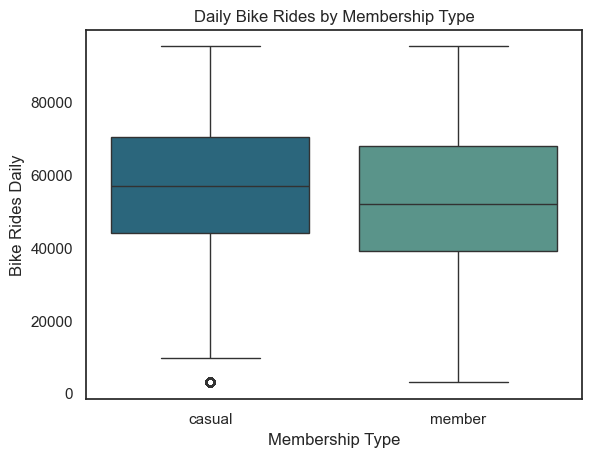

<Figure size 640x480 with 0 Axes>

In [16]:

#Plot 1 Daily Bike Rides by member type
sns.boxplot(data=df, x='member_casual', y='bike_rides_daily', palette="crest_r")
plt.xlabel('Membership Type')
plt.ylabel('Bike Rides Daily')
plt.title('Daily Bike Rides by Membership Type')
plt.show()
plt.clf()


#### The categorical variable chosen is member_casual or membership type. The box plots shows that the casual riders have more rides than members. At the 50th percentile, casual riders have close to 60,000 rides, while members have around 50,000 rides. Both the 25th and 75th percentile for casual riderss are also higher than for members. We also see that casual riders have an outlier below the minimum. 

C:\Users\Windows\AppData\Local\Temp\ipykernel_14028\2199224891.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='rideable_type', y='bike_rides_daily', palette="crest_r")


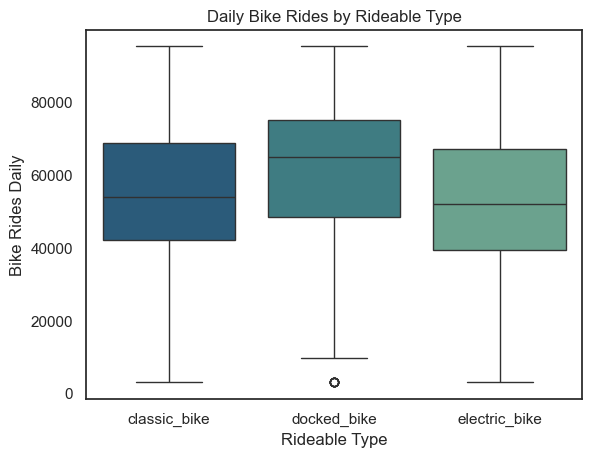

<Figure size 640x480 with 0 Axes>

In [17]:
# Plot 2 - Daily Bike Rides by bike type
sns.boxplot(data=df, x='rideable_type', y='bike_rides_daily', palette="crest_r")
plt.xlabel('Rideable Type')
plt.ylabel('Bike Rides Daily')
plt.title('Daily Bike Rides by Rideable Type')
plt.show()
plt.clf()



#### The categorical variable chosen is rideable_type. 
#### For the classic bike, the median is around 55,000, 25th percentile is around 42,000; and 75th percentile is around 70,000. The interquartile range is around 28,000. 
#### For the docked bike, the median is around 65,000 25th percentile is around 50,000; and 75th percentile is around 78,000. The interquartile range is around 28,000. 
#### For the electric bike, the median is around 54,000 25th percentile is around 40,000; and 75th percentile is around 68,000. The interquartile range is around 28,000. 
#### The spread of data appears to be consistent except for an outlier for the docked_bike subcategory. Docked bikes appears to be more popular than the other bike types.

## Section F - FacetGrid to compare the number of bike rides between the three types of bikes (classic, docked, electric).  

#### This section covers two methods to build a grid of subplots based on the levels in a category variable. The category variable is rideable_type, which has three levels: classic bike, docked bike, and electric bike. 

C:\Users\Windows\Anaconda3_new\envs\venv_bike\Lib\site-packages\seaborn\axisgrid.py:718: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
C:\Users\Windows\Anaconda3_new\envs\venv_bike\Lib\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)
C:\Users\Windows\Anaconda3_new\envs\venv_bike\Lib\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)
C:\Users\Windows\Anaconda3_new\envs\venv_bike\Lib\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and w

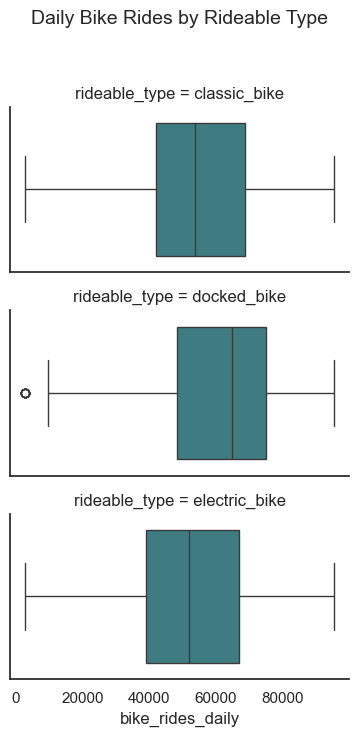

<Figure size 640x480 with 0 Axes>

In [30]:
# Method 1 uses the FacetGrid function of Seaborn to create a grid of subplots based on the levels of the rideable_type category.

# Creating the FacetGrid with specified columns
grid = sns.FacetGrid(df, row="rideable_type", height=2.5, aspect=1.5)

# Mapping the boxplot to the grid with a specific palette
grid.map(sns.boxplot, 'bike_rides_daily', palette="crest_r")

# Adding a title to the overall figure
grid.fig.suptitle('Daily Bike Rides by Rideable Type', fontsize=14)


# Adjusting the layout to make room for the title
grid.fig.subplots_adjust(top=0.85)  # Decrease this value to push the title up
grid.fig.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust rect to leave space for title

# Displaying the plot
plt.show()

# Clearing the plot
plt.clf()

C:\Users\Windows\AppData\Local\Temp\ipykernel_14028\591048986.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  g = sns.catplot(data=df, x='bike_rides_daily', kind='box', row='rideable_type', palette='crest_r', height=2.5, aspect=1.5)


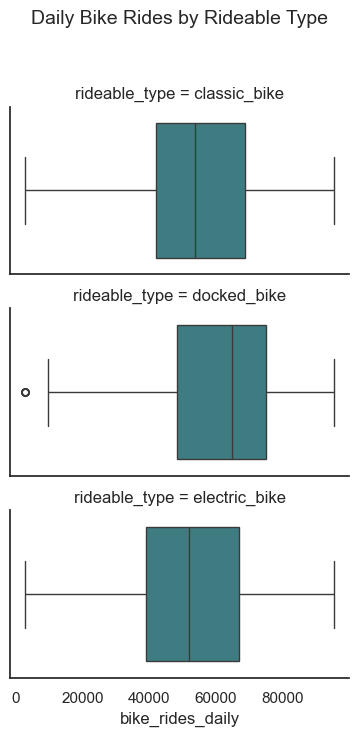

<Figure size 640x480 with 0 Axes>

In [41]:
# Method 2 uses the catplot function as an alternative to build grid of subplots based on the levels of the rideable_type category.

# Creating the catplot
g = sns.catplot(data=df, x='bike_rides_daily', kind='box', row='rideable_type', palette='crest_r', height=2.5, aspect=1.5)

# Adding a title to the overall figure
g.fig.suptitle('Daily Bike Rides by Rideable Type', fontsize=14)

# Adjusting the layout to make room for the title
g.fig.subplots_adjust(top=0.85)

# Displaying the plot
plt.show()

# Clearing the plot
plt.clf()

#### The key insight from the FacetGrid plot is that docked bikes are more popular than either classic or electric bikes based on the count of daily bike rides. However, we also see an outlier for the docked_bike subcategory. The median for docked bikes is around 65,000, while for the electric bikes and classic bikes, the median is around 55,000. At the 75th percentile, the docked bikes have close 80,000 rides. Docked bikes as a subcategory of bikes are worth investigating further. 

#### As a result of the above analysis, it is also worth investigatng the number of bike rides along an additional dimension. This subsection shows boxplots along two dimentions: membership type (member, casual) and rideable_type or the type of bike (classic, docked, electric)  

C:\Users\Windows\AppData\Local\Temp\ipykernel_14028\359447637.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  g = sns.catplot(data=df, x='bike_rides_daily', kind='box', row ='rideable_type', col='member_casual', palette='crest_r', height=2.5, aspect=1.5)


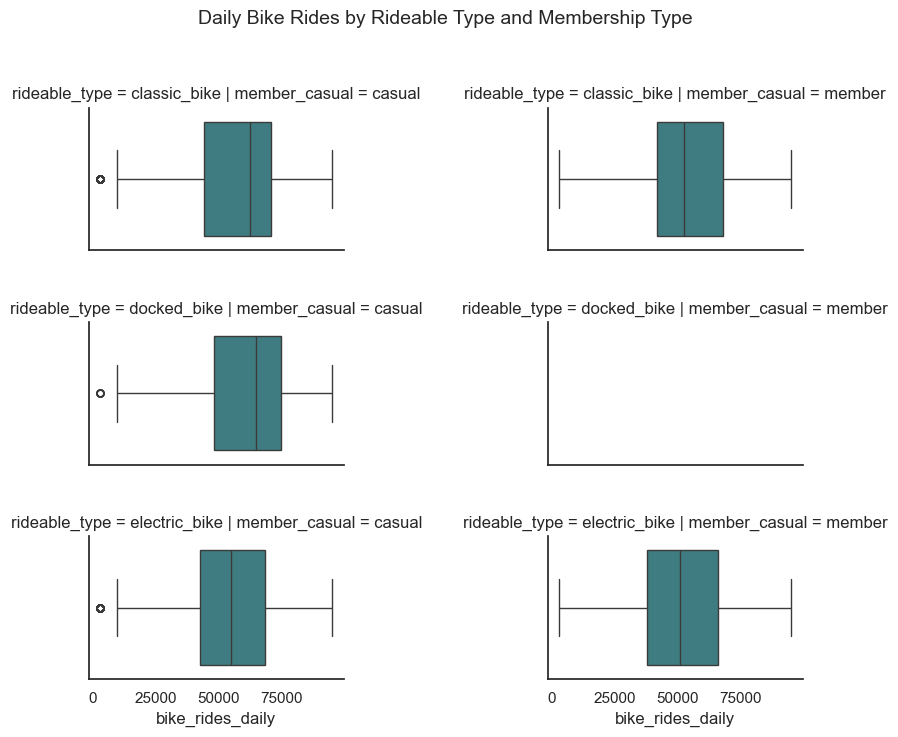

<Figure size 640x480 with 0 Axes>

In [39]:
# Creating the catplot
g = sns.catplot(data=df, x='bike_rides_daily', kind='box', row ='rideable_type', col='member_casual', palette='crest_r', height=2.5, aspect=1.5)

# Adding a title to the overall figure
g.fig.suptitle('Daily Bike Rides by Rideable Type and Membership Type', fontsize=14)

# Adjusting the layout to make room for the title and avoid text overlap
g.fig.subplots_adjust(top=0.85, hspace=0.5, wspace=0.8)

# Displaying the plot
plt.show()

# Clearing the plot
plt.clf()

#### Key insights from the plots: 1)docked bikes are not popular among members as there are no rides recorded; 2) Among the casual riders, classic and docked bikes are more popular than electric bikes; 3) Among members, the median for each type of bike is comparable; 4) There are outliers recorded for the casual riders. 